In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

# Initialise data of lists with some null values
Data = {
    'Name': ['Akshat', 'Atharva', 'Ayaan', 'Gaurang', 'Shreyash', 'Siddhant','Aakanksha','Purva','Srushti'],
    'Age': [20, 21, 20, 21, 20, None,20,None,None],
    'Attendance': [95, 97, 95, 90, 60, None,70,75,60],
    'English': [88, 92, 85, None, 70, 75,76,None,98],
    'Hindi': [90, None, 80, 85, 65, 78,96,70,None],
    'Physics': [78, 85, None, 88, 72, 80,79,75,67],
    'Maths': [None, 95, 89, 84, 69, 76, None, 78, 98],
    'Email': [
        'akshat@example.com',
        'atharva@example.com',
        'ayaan@example.com',
        'gaurang@example.com',
        'Shreyash@example.com',
        'siddhant@example.com',
        'Aakanksha@example.com',
        'Purva@example.com',
        'Srushti@example.com'
    ]
}

# Create DataFrame
df = pd.DataFrame(Data)

# Print the DataFrame
df

,Name,Age,Attendance,English,Hindi,Physics,Maths,Email
0,Akshat,20.0,95.0,88.0,90.0,78.0,NaN,akshat@example.com
1,Atharva,21.0,97.0,92.0,NaN,85.0,95.0,atharva@example.com
2,Ayaan,20.0,95.0,85.0,80.0,NaN,89.0,ayaan@example.com
3,Gaurang,21.0,90.0,NaN,85.0,88.0,84.0,gaurang@example.com
4,Shreyash,20.0,60.0,70.0,65.0,72.0,69.0,None
5,Siddhant,NaN,NaN,75.0,78.0,80.0,76.0,siddhant@example.com
6,Aakanksha,20.0,70.0,76.0,96.0,79.0,NaN,Aakanksha@example.com
7,Purva,NaN,75.0,NaN,70.0,75.0,78.0,Purva@example.com
8,Srushti,NaN,60.0,98.0,NaN,67.0,98.0,Srushti@example.com


In [3]:
print("\n--- First 5 Rows of Dataset ---")
df.head()


--- First 5 Rows of Dataset ---


,Name,Age,Attendance,English,Hindi,Physics,Maths,Email
0,Akshat,20.0,95.0,88.0,90.0,78.0,NaN,akshat@example.com
1,Atharva,21.0,97.0,92.0,NaN,85.0,95.0,atharva@example.com
2,Ayaan,20.0,95.0,85.0,80.0,NaN,89.0,ayaan@example.com
3,Gaurang,21.0,90.0,NaN,85.0,88.0,84.0,gaurang@example.com
4,Shreyash,20.0,60.0,70.0,65.0,72.0,69.0,None


In [4]:
print("/n--- Last 5 Rows of Dataset ---")
df.tail()

/n--- Last 5 Rows of Dataset ---


,Name,Age,Attendance,English,Hindi,Physics,Maths,Email
4,Shreyash,20.0,60.0,70.0,65.0,72.0,69.0,None
5,Siddhant,NaN,NaN,75.0,78.0,80.0,76.0,siddhant@example.com
6,Aakanksha,20.0,70.0,76.0,96.0,79.0,NaN,Aakanksha@example.com
7,Purva,NaN,75.0,NaN,70.0,75.0,78.0,Purva@example.com
8,Srushti,NaN,60.0,98.0,NaN,67.0,98.0,Srushti@example.com


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        9 non-null      object 
 1   Age         6 non-null      float64
 2   Attendance  8 non-null      float64
 3   English     7 non-null      float64
 4   Hindi       7 non-null      float64
 5   Physics     8 non-null      float64
 6   Maths       7 non-null      float64
 7   Email       8 non-null      object 
dtypes: float64(6), object(2)
memory usage: 708.0+ bytes


In [6]:
df.isnull().sum()

Name          0
Age           3
Attendance    1
English       2
Hindi         2
Physics       1
Maths         2
Email         1
dtype: int64

In [7]:
#finding mean values 
english_mean = df['English'].mean()
hindi_mean = df['Hindi'].mean()

#print mean values
print("english_mean : ",english_mean)
print("hindi_mean : ",hindi_mean)

english_mean :  83.42857142857143
hindi_mean :  80.57142857142857


In [8]:
df['English'].fillna(english_mean, inplace=True)
df['Hindi'].fillna(hindi_mean, inplace=True)

In [9]:
#updated null value counter
df.isnull().sum()

Name          0
Age           3
Attendance    1
English       0
Hindi         0
Physics       1
Maths         2
Email         1
dtype: int64

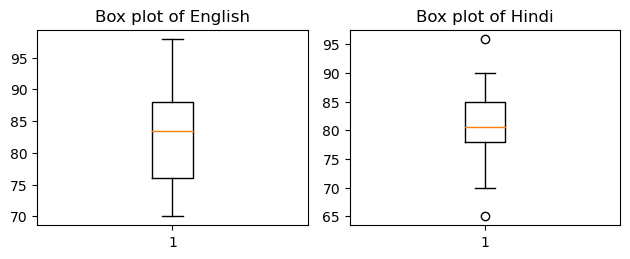

In [10]:
def showOutliers():
    for i, col in enumerate(['English', 'Hindi']):
        plt.subplot(2, 2, i+1)
        plt.boxplot(df[col])
        plt.title(f'Box plot of {col}')
    plt.tight_layout()
    plt.show()
showOutliers()

In [11]:
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5*IQR
    upper_bound = q3 + 1.5*IQR
    df = df[(df[col]>=lower_bound)&(df[col]<=upper_bound)]

df

,Name,Age,Attendance,English,Hindi,Physics,Maths,Email
1,Atharva,21.0,97.0,92.000000,80.571429,85.0,95.0,atharva@example.com
3,Gaurang,21.0,90.0,83.428571,85.000000,88.0,84.0,gaurang@example.com


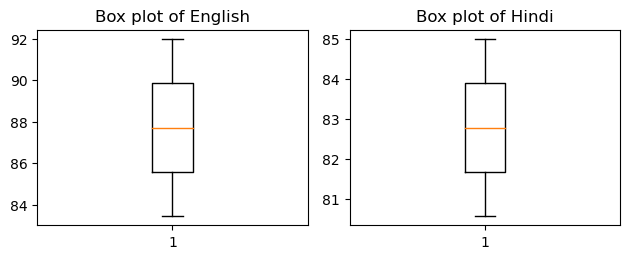

In [12]:
showOutliers()

In [13]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the data
normalized_data = scaler.fit_transform(df[df.select_dtypes(include=np.number).columns])
print("Normalized Data (Min-Max Scaling):")
print(normalized_data)

Normalized Data (Min-Max Scaling):
[[0. 1. 1. 0. 0. 1.]
 [0. 0. 0. 1. 1. 0.]]
